In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = '/kaggle/input/arthritis-data/clean_data.csv'
data = pd.read_csv(file_path, low_memory=False)

# Display the first few rows of the dataset
data_head = data.head()
data_info = data.info()

data_head, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RowId                  250937 non-null  object 
 1   YearStart              250937 non-null  int64  
 2   YearEnd                250937 non-null  int64  
 3   LocationAbbr           250937 non-null  object 
 4   LocationDesc           250937 non-null  object 
 5   Class                  250937 non-null  object 
 6   Topic                  250937 non-null  object 
 7   Question               250937 non-null  object 
 8   Low_Confidence_Limit   250937 non-null  float64
 9   High_Confidence_Limit  250937 non-null  float64
 10  Data_Value_Type        250937 non-null  object 
 11  Data_Value             250937 non-null  float64
 12  Age average            250937 non-null  float64
 13  Ethnicity              250937 non-null  object 
 14  Geolocation            224228 non-nu

(                                        RowId  YearStart  YearEnd  \
 0     BRFSS~2021~2021~9004~Q43~TOC11~AGE~RACE       2021     2021   
 1  BRFSS~2017~2017~9001~Q43~TOC11~AGE~OVERALL       2017     2017   
 2  BRFSS~2019~2019~9002~Q02~TNC02~AGE~OVERALL       2019     2019   
 3     BRFSS~2020~2020~59~Q43~TOC11~AGE~GENDER       2020     2020   
 4     BRFSS~2020~2020~33~Q03~TMC01~AGE~GENDER       2020     2020   
 
   LocationAbbr                     LocationDesc  \
 0         WEST                             West   
 1          NRE                        Northeast   
 2          MDW                          Midwest   
 3           US  United States, DC & Territories   
 4           NH                    New Hampshire   
 
                                  Class                              Topic  \
 0                       Overall Health       Arthritis among older adults   
 1                       Overall Health       Arthritis among older adults   
 2  Nutrition/Physical Activit

In [4]:
# Step 1: Cleaning and preparing the data

# Extract latitude and longitude from Geolocation if it's present
data[['Latitude', 'Longitude']] = data['Geolocation'].str.extract(r'POINT \((.*?) (.*?)\)')

# Convert the Latitude and Longitude to numeric types
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')

# Handle missing data
missing_data_summary = data.isnull().sum()

missing_data_summary


RowId                        0
YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
Class                        0
Topic                        0
Question                     0
Low_Confidence_Limit         0
High_Confidence_Limit        0
Data_Value_Type              0
Data_Value                   0
Age average                  0
Ethnicity                    0
Geolocation              26709
Latitude                 26709
Longitude                26709
dtype: int64

In [5]:
# Drop rows with missing Geolocation data
data_cleaned = data.dropna(subset=['Geolocation'])

# Verify the changes
cleaned_data_info = data_cleaned.info()

cleaned_data_info


<class 'pandas.core.frame.DataFrame'>
Index: 224228 entries, 4 to 250936
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RowId                  224228 non-null  object 
 1   YearStart              224228 non-null  int64  
 2   YearEnd                224228 non-null  int64  
 3   LocationAbbr           224228 non-null  object 
 4   LocationDesc           224228 non-null  object 
 5   Class                  224228 non-null  object 
 6   Topic                  224228 non-null  object 
 7   Question               224228 non-null  object 
 8   Low_Confidence_Limit   224228 non-null  float64
 9   High_Confidence_Limit  224228 non-null  float64
 10  Data_Value_Type        224228 non-null  object 
 11  Data_Value             224228 non-null  float64
 12  Age average            224228 non-null  float64
 13  Ethnicity              224228 non-null  object 
 14  Geolocation            224228 non-null  o

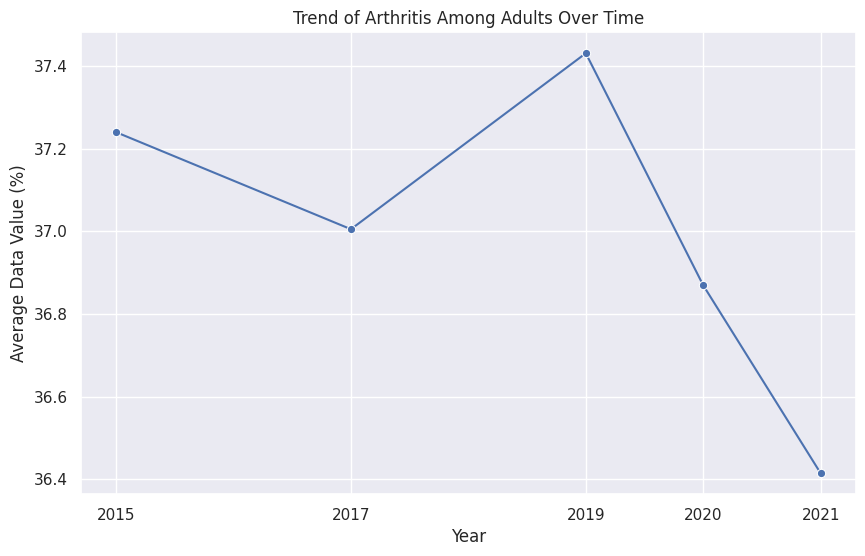

In [7]:
# Filter the dataset for the specific topic: "Arthritis among older adults"
arthritis_data = data_cleaned[data_cleaned['Topic'].str.contains('Arthritis', case=False)]

# Group by year and calculate the mean Data_Value for each year
arthritis_trends = arthritis_data.groupby('YearStart')['Data_Value'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.lineplot(x='YearStart', y='Data_Value', data=arthritis_trends, marker='o')
plt.title('Trend of Arthritis Among Adults Over Time')
plt.xlabel('Year')
plt.ylabel('Average Data Value (%)')
plt.xticks(arthritis_trends['YearStart'].unique())
plt.show()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")


The chart above shows the trend of arthritis among adults over time based on the average data values from the dataset. Here's a summary of what we observe:

2015-2017: There is a slight decline in the reported average percentage of adults with arthritis.
2017-2019: The percentage increases, peaking around 2019.
2019-2021: A significant decline is observed, with the lowest point in 2021.
This trend may reflect various factors such as changes in survey methods, health interventions, or other external factors affecting arthritis prevalence or reporting.

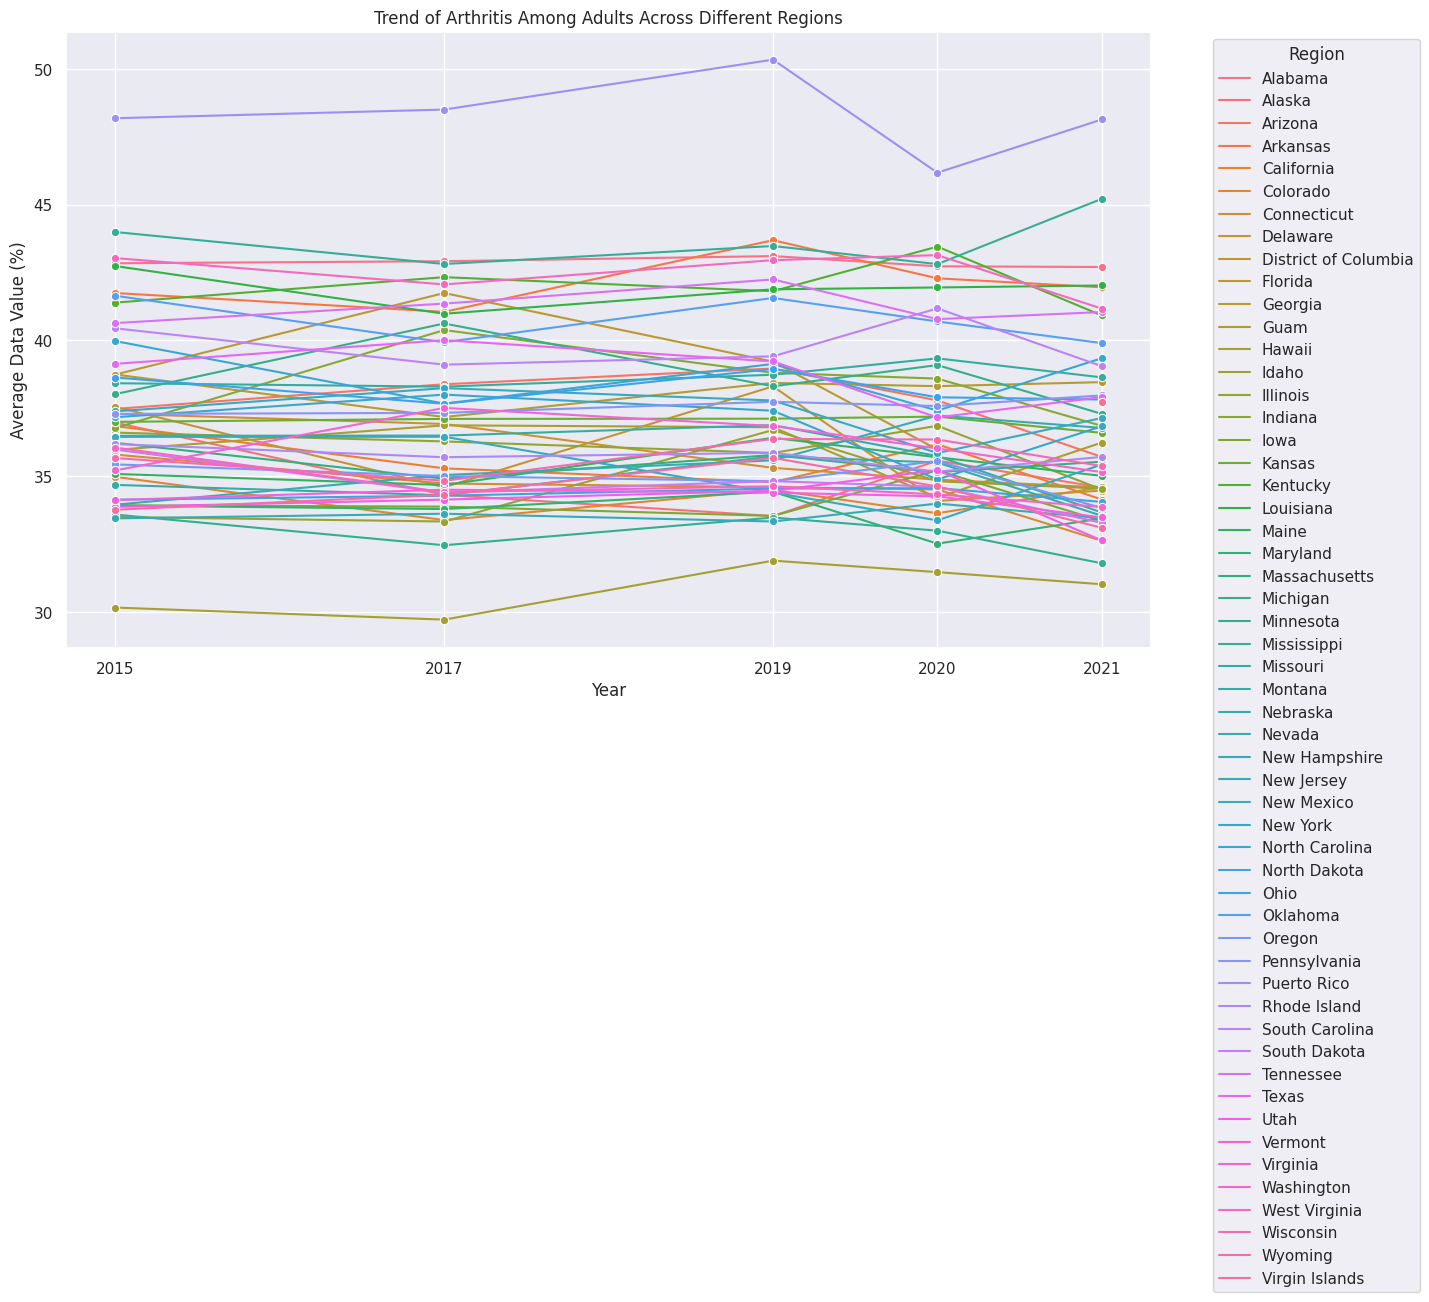

In [8]:
# Group the data by Year and Location, and calculate the mean Data_Value for each combination
arthritis_region_trends = arthritis_data.groupby(['YearStart', 'LocationDesc'])['Data_Value'].mean().reset_index()

# Plot the trends across different regions
plt.figure(figsize=(14, 8))
sns.lineplot(x='YearStart', y='Data_Value', hue='LocationDesc', data=arthritis_region_trends, marker='o')
plt.title('Trend of Arthritis Among Adults Across Different Regions')
plt.xlabel('Year')
plt.ylabel('Average Data Value (%)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(arthritis_region_trends['YearStart'].unique())
plt.show()


The chart illustrates the trends of arthritis among adults across different regions over time. Here are some key observations:

Regional Variability: The prevalence of arthritis varies significantly across different regions. Some regions consistently report higher percentages (e.g., Puerto Rico), while others show lower prevalence.
General Trends: Despite the general trend observed earlier, the specific trajectory of arthritis prevalence varies by region. Some regions exhibit increasing trends, while others show decreasing or fluctuating patterns.
Peak in 2019: Many regions seem to peak around 2019 before declining, mirroring the overall trend observed in the national data.
This comparison highlights the importance of considering regional differences when analyzing health trends. Some regions may require targeted interventions based on their specific trends and challenges.

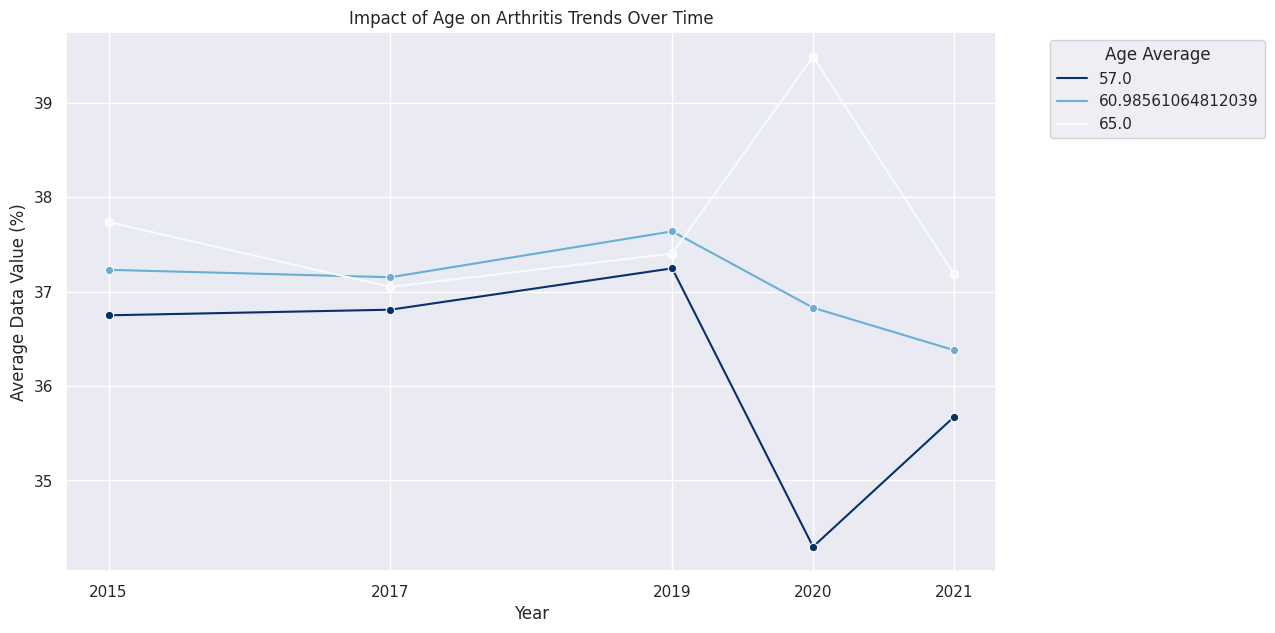

In [9]:
# Group the data by Year, Age average, and Location to analyze the impact of age on arthritis trends
arthritis_age_trends = arthritis_data.groupby(['YearStart', 'Age average'])['Data_Value'].mean().reset_index()

# Plot the trends for different age groups
plt.figure(figsize=(12, 7))
sns.lineplot(x='YearStart', y='Data_Value', hue='Age average', data=arthritis_age_trends, marker='o', palette="Blues_r")
plt.title('Impact of Age on Arthritis Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Data Value (%)')
plt.legend(title='Age Average', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(arthritis_age_trends['YearStart'].unique())
plt.show()


The chart above illustrates the impact of different age groups on arthritis trends over time. Here's what we can observe:

Age-Related Trends:

The older age group (average age of 65) generally reports higher percentages of arthritis prevalence compared to younger groups.
The trend for the older age group shows a noticeable peak in 2019 followed by a decline, consistent with the overall trend observed earlier.
The middle age group (average age around 61) follows a similar pattern but with slightly lower percentages.
The younger age group (average age of 57) shows a more gradual increase up to 2019 and a sharp decline in 2020, followed by a slight recovery in 2021.
2019 Peak: All age groups seem to peak around 2019, indicating a potential national trend during that period.

Impact of Age: The older the age group, the higher the prevalence of arthritis, which aligns with medical expectations. The trends also suggest that arthritis is more prevalent and possibly more consistently reported among older adults.

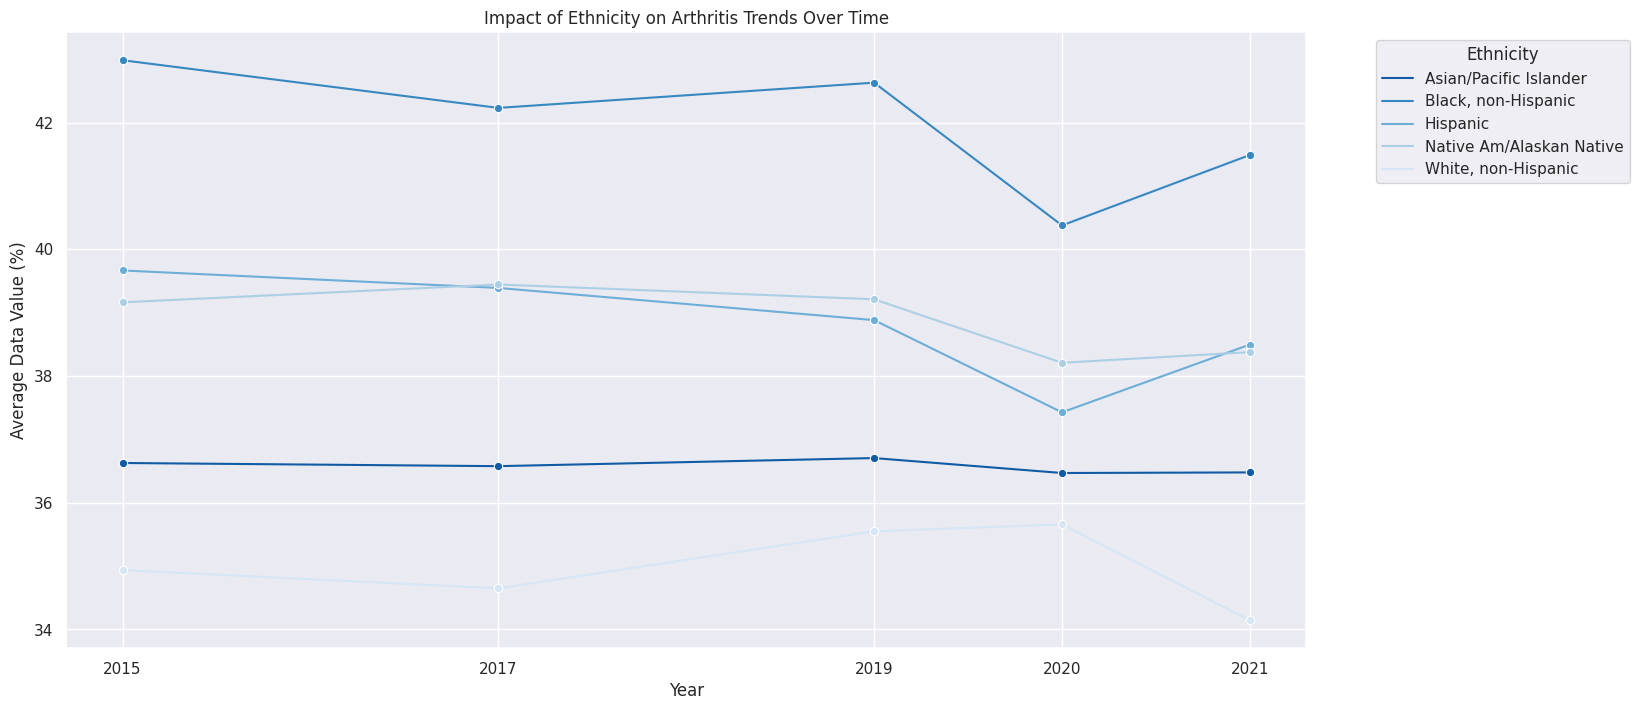

In [10]:
# Group the data by Year, Ethnicity, and calculate the mean Data_Value for each combination
arthritis_ethnicity_trends = arthritis_data.groupby(['YearStart', 'Ethnicity'])['Data_Value'].mean().reset_index()

# Plot the trends for different ethnicities
plt.figure(figsize=(16, 8))
sns.lineplot(x='YearStart', y='Data_Value', hue='Ethnicity', data=arthritis_ethnicity_trends, marker='o', palette="Blues_r")
plt.title('Impact of Ethnicity on Arthritis Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Data Value (%)')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(arthritis_ethnicity_trends['YearStart'].unique())
plt.show()


The chart above illustrates the trends in arthritis prevalence among different ethnic groups over time. Here are some key observations:

Higher Prevalence Among Native American/Alaskan Native and Black, non-Hispanic Groups:

The Native American/Alaskan Native and Black, non-Hispanic groups consistently show higher average percentages of arthritis prevalence compared to other ethnic groups.
These groups also show a slight decline post-2019, but they maintain higher levels than other groups.
Lower Prevalence Among Asian/Pacific Islander:

The Asian/Pacific Islander group has the lowest prevalence of arthritis throughout the years, with a relatively stable trend.
White, non-Hispanic and Hispanic Groups:

Both the White, non-Hispanic and Hispanic groups show a similar declining trend after 2019, though they maintain an intermediate level of prevalence compared to the other groups.